<a href="https://colab.research.google.com/github/hufsaim/T10302201/blob/main/notebook/lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy import signal
from IPython.display import Audio

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import glob

## 여러 개의 wav파일들의 목록을 만든 후, 그 중 하나의 파일을 가져와 음성신호를 확인합니다.

In [ ]:
path0 = 'data/hw5'
flist = np.random.permutation(glob.glob(path0+'/*.wav'))
flist

In [6]:
fs,d1 = wavfile.read(flist[0])
t = np.arange(0,len(d1))/fs
freq = np.fft.fftfreq(len(t),1/fs)
noise = np.random.normal(0,1,d1.shape) *np.std(d1)

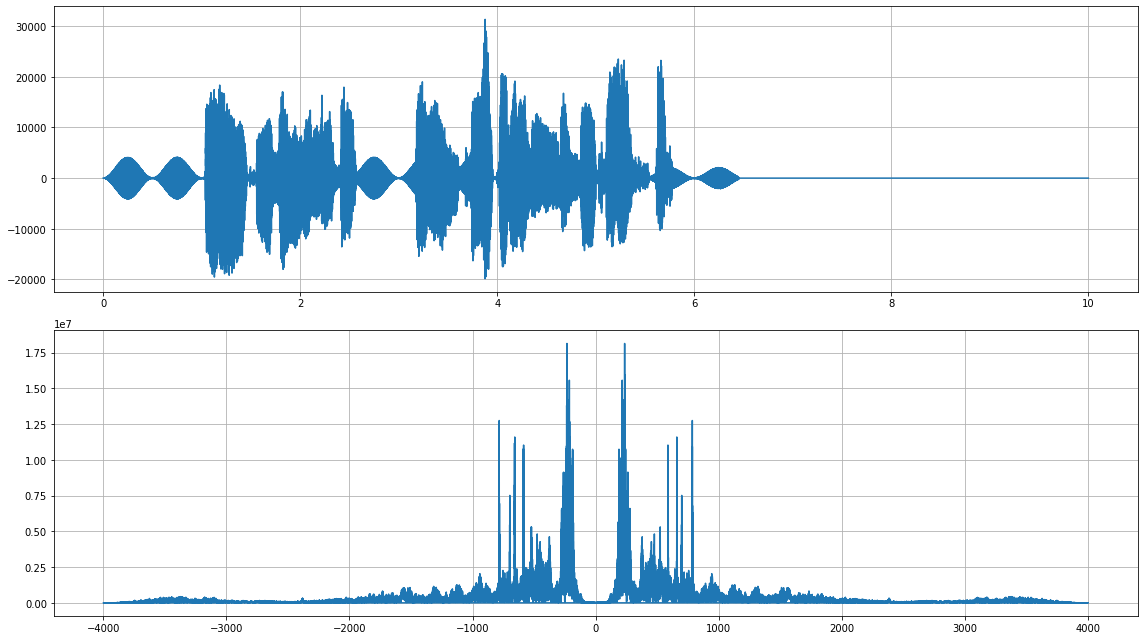

In [7]:
plt.figure(figsize=(16,9))
plt.subplot(211)
plt.plot(t,d1)
plt.grid('on')

plt.subplot(212)
plt.plot(freq,np.abs(np.fft.fft(d1)))
plt.grid('on')

plt.tight_layout()
plt.show()

In [8]:
Audio(d1,rate=fs)

## Lowpass filtering
- cutoff frequency를 바꾸어가며 lowpass filtering의 효과를 음성신호의 변화로 확인합니다.
- Frequency domain에서 음의 주파수에 해당하는 부분을 0으로 하였을 때 음성신호에는 어떤 영향이 있나요?

In [9]:
wc = 1600
H = np.ones_like(d1)
H[freq<0]=0
H[freq>wc]=0

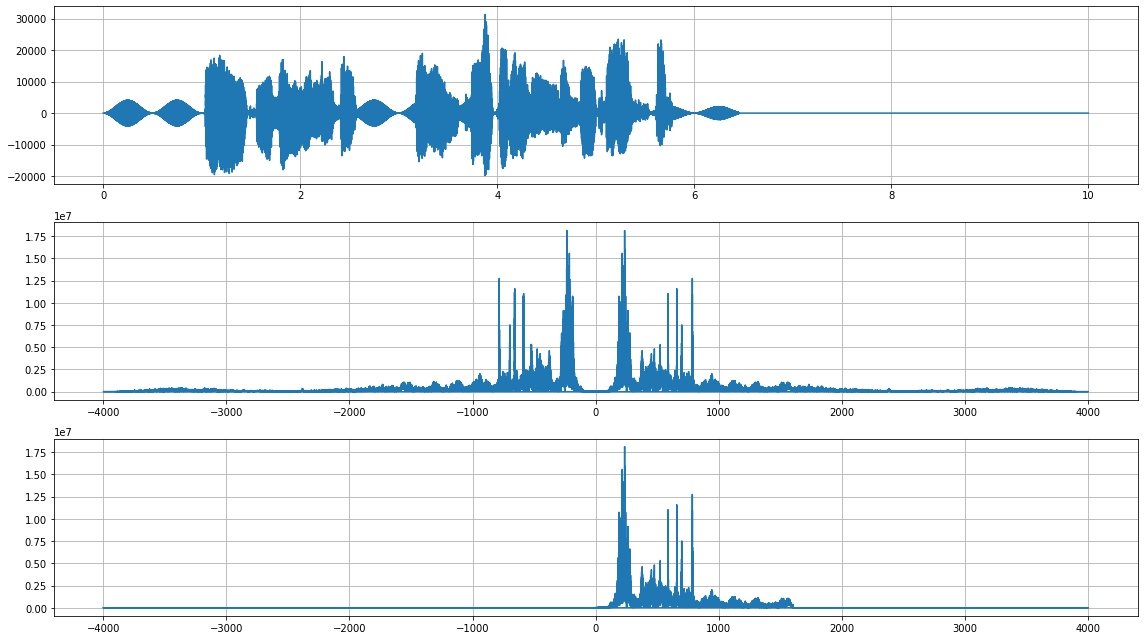

In [10]:
D1 = np.fft.fft(d1)
Y1 = np.fft.fft(d1)*H

plt.figure(figsize=(16,9))
plt.subplot(311)
plt.plot(t,d1)
plt.grid('on')

plt.subplot(312)
plt.plot(freq,np.abs(D1))
plt.grid('on')

plt.subplot(313)
plt.plot(freq,np.abs(Y1))
plt.tight_layout()
plt.grid('on')
plt.show()

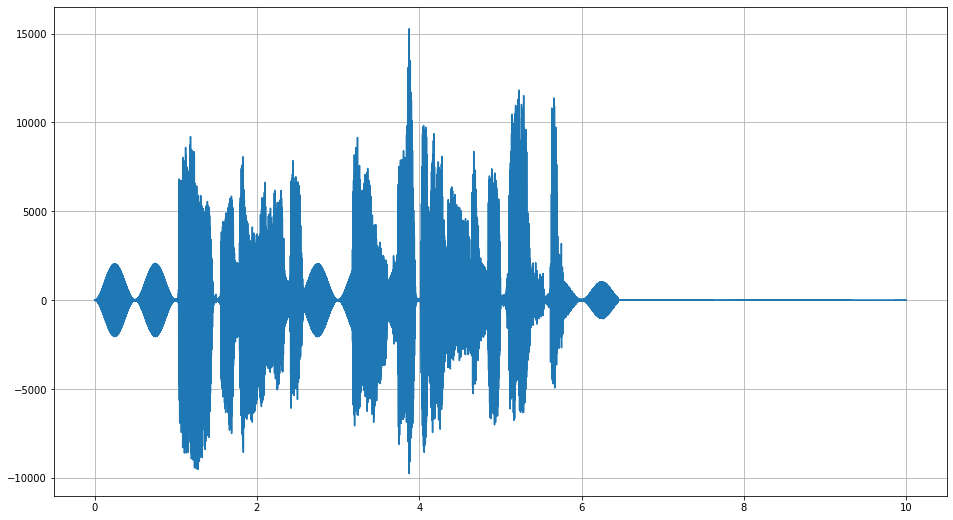

/usr/local/lib/python3.7/dist-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [11]:
r1 = np.fft.ifft(Y1)
plt.figure(figsize=(16,9))
plt.plot(t,np.real(r1))
plt.grid('on')
plt.show()
Audio(r1,rate=fs)

- 음의 주파수에 해당하는 부분을 양의 주파수 신호로 채워보고, inverse Fourier transform을 통해 음성신호의 변화를 확인해 봅니다.

(array([64000]),) (array([0]),) (array([16000]),)


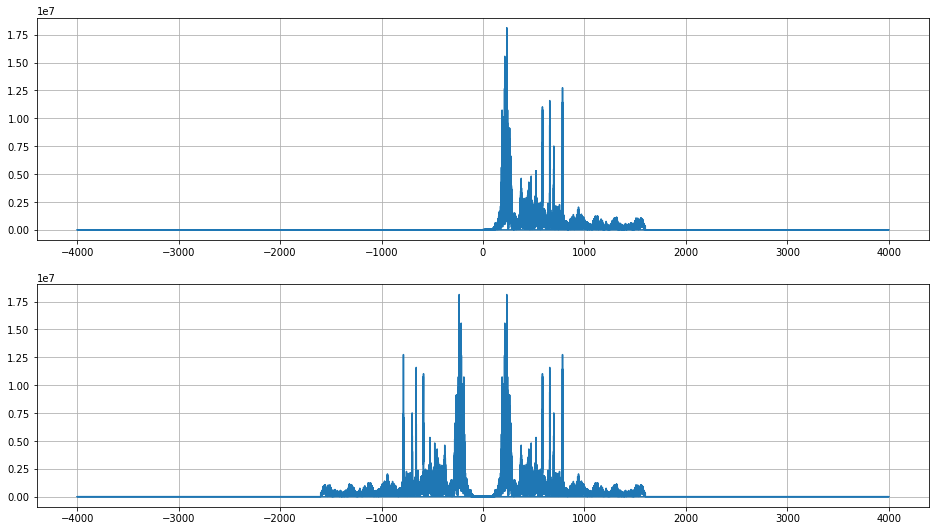

In [12]:
plt.figure(figsize=(16,9))

plt.subplot(211)
plt.plot(freq,np.abs(Y1))
plt.grid('on')
wn,w0,wp = np.where(freq==-wc),np.where(freq==0),np.where(freq==wc)
print(wn,w0,wp)

Y1r = Y1.copy()
Y1r[wn[0][0]:]=(Y1[1:wp[0][0]+1][::-1])
#Y1r[wn[0][0]:]=np.conj(Y1[1:wp[0][0]+1][::-1])
plt.subplot(212)
plt.plot(freq,np.abs(Y1r))
plt.grid('on')

plt.show()

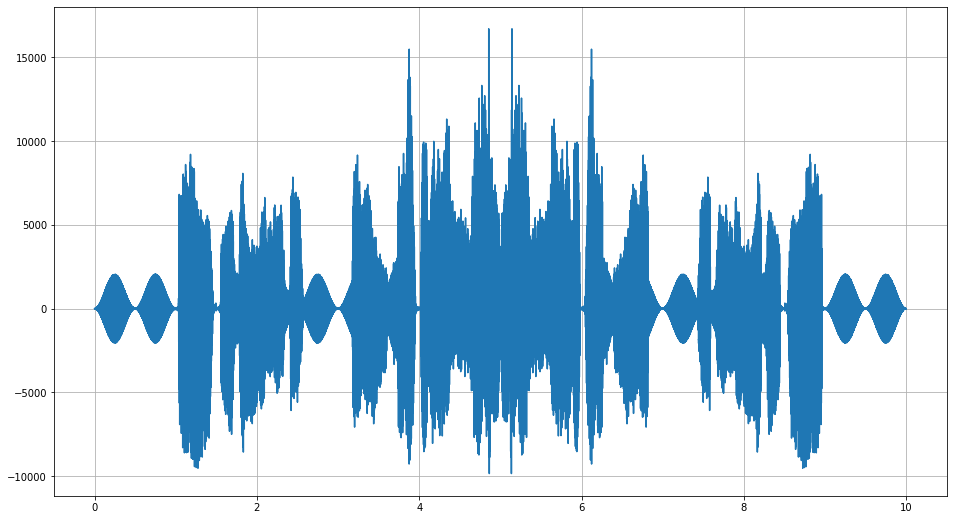

/usr/local/lib/python3.7/dist-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [13]:
rr1 = np.fft.ifft(Y1r)
plt.figure(figsize=(16,9))
plt.plot(t,np.real(rr1))
plt.grid('on')
plt.show()
Audio(rr1,rate=fs)

## 여러 wav파일을 합성하기

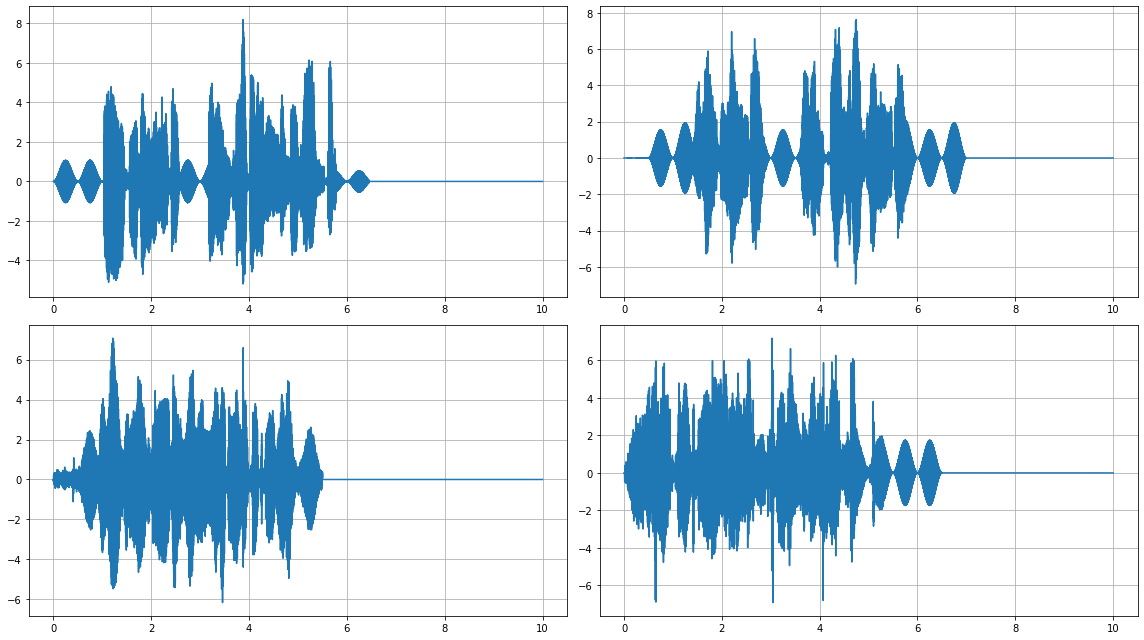

In [14]:
fs,d1 = wavfile.read(flist[0])
fs,d2 = wavfile.read(flist[1])
fs,d3 = wavfile.read(flist[2])
fs,d4 = wavfile.read(flist[3])

d1 = (d1 - np.mean(d1))/np.std(d1)
d2 = (d2 - np.mean(d2))/np.std(d2)
d3 = (d3 - np.mean(d3))/np.std(d3)
d4 = (d4 - np.mean(d4))/np.std(d4)

plt.figure(figsize=(16,9))
plt.subplot(221)
plt.plot(t,d1)
plt.grid('on')
plt.subplot(222)
plt.plot(t,d2)
plt.grid('on')
plt.subplot(223)
plt.plot(t,d3)
plt.grid('on')
plt.subplot(224)
plt.plot(t,d4)
plt.grid('on')
plt.tight_layout()
plt.show()

Audio(d1+d2+d3+d4,rate=fs)

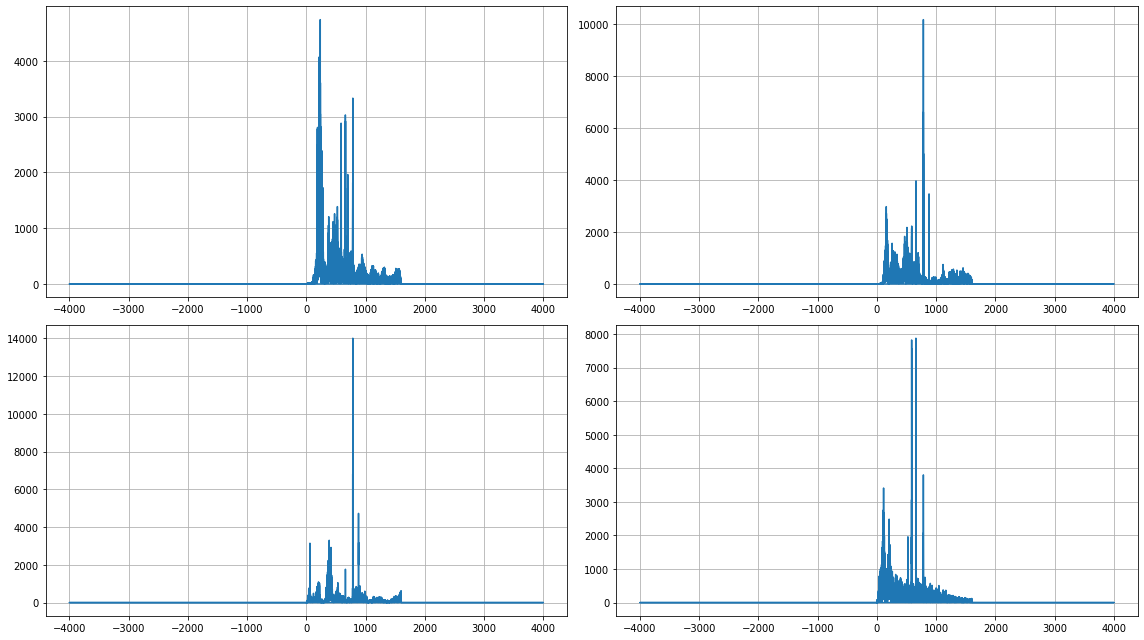

In [16]:
Y1 = np.fft.fft(d1)*H
Y2 = np.fft.fft(d2)*H
Y3 = np.fft.fft(d3)*H
Y4 = np.fft.fft(d4)*H

plt.figure(figsize=(16,9))

plt.subplot(221)
plt.plot(freq,np.abs(Y1))
plt.grid('on')

plt.subplot(222)
plt.plot(freq,np.abs(Y2))
plt.grid('on')

plt.subplot(223)
plt.plot(freq,np.abs(Y3))
plt.grid('on')

plt.subplot(224)
plt.plot(freq,np.abs(Y4))
plt.tight_layout()
plt.grid('on')

plt.show()

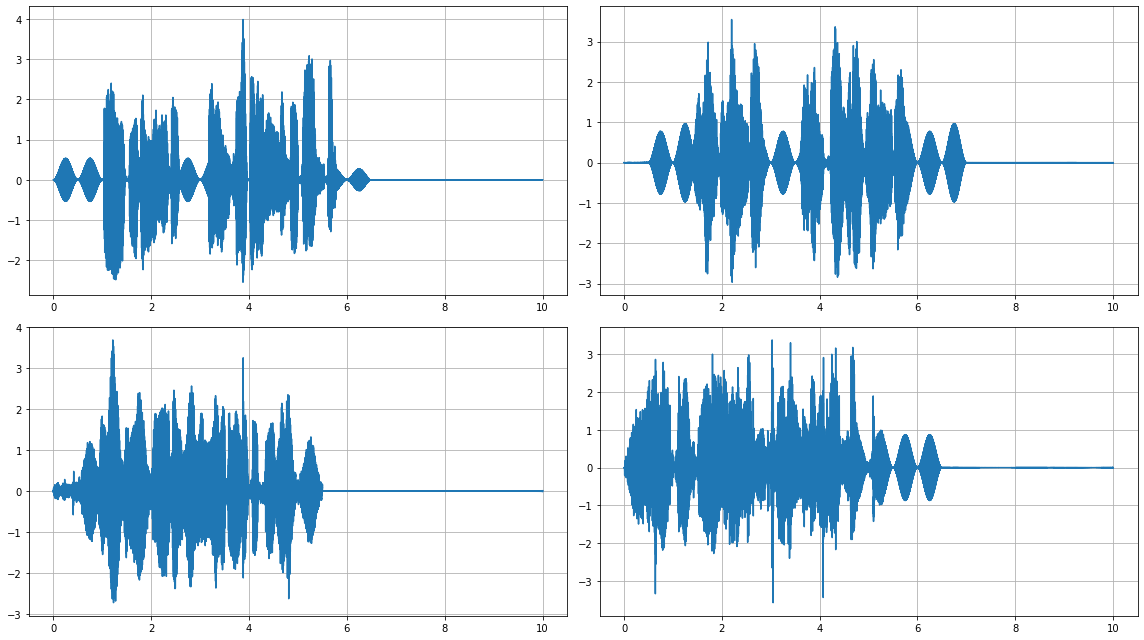

In [17]:
r1 = np.fft.ifft(Y1)
r2 = np.fft.ifft(Y2)
r3 = np.fft.ifft(Y3)
r4 = np.fft.ifft(Y4)
plt.figure(figsize=(16,9))
plt.subplot(221)
plt.plot(t,np.real(r1))
plt.grid('on')
plt.subplot(222)
plt.plot(t,np.real(r2))
plt.grid('on')
plt.subplot(223)
plt.plot(t,np.real(r3))
plt.grid('on')
plt.subplot(224)
plt.plot(t,np.real(r4))
plt.grid('on')
plt.tight_layout()
plt.show()

- 각각을 lowpass filtering하고, 신호를 합쳐서 어떻게 들려지는 지 확인합니다.

In [18]:
Audio(r1+r2+r3+r4,rate=fs)

/usr/local/lib/python3.7/dist-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


## 각각의 신호를 다른 주파수로 modulation을 진행하고, 하나의 신호로 합성하기

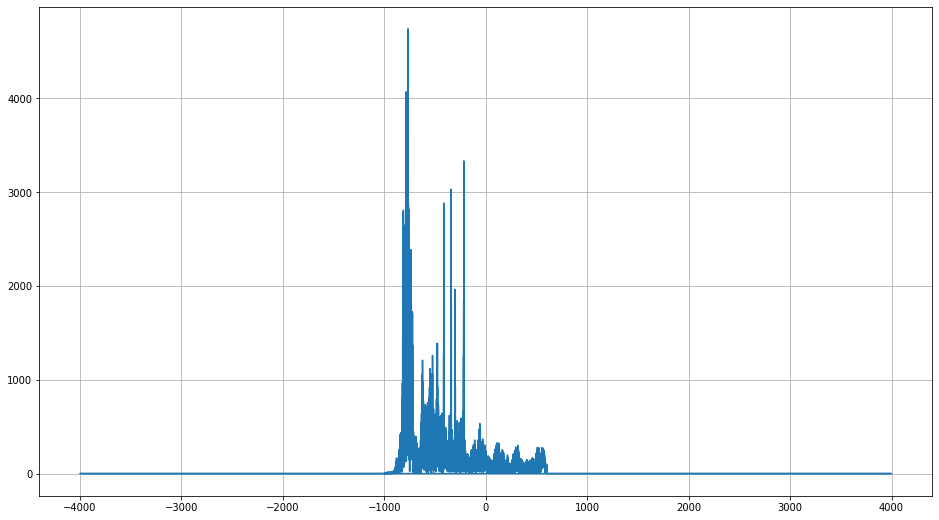

In [19]:
f0 = -200
f = 1000
h0 = np.exp(1j*2*np.pi*f0*t)
h = np.exp(1j*2*np.pi*f*t)
s1 = np.conj(h)*r1
S1 = np.fft.fft(s1)
plt.figure(figsize=(16,9))
plt.plot(freq,np.abs(S1))
plt.grid('on')
plt.show()

In [20]:
Audio(h*r1,rate=fs)

/usr/local/lib/python3.7/dist-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


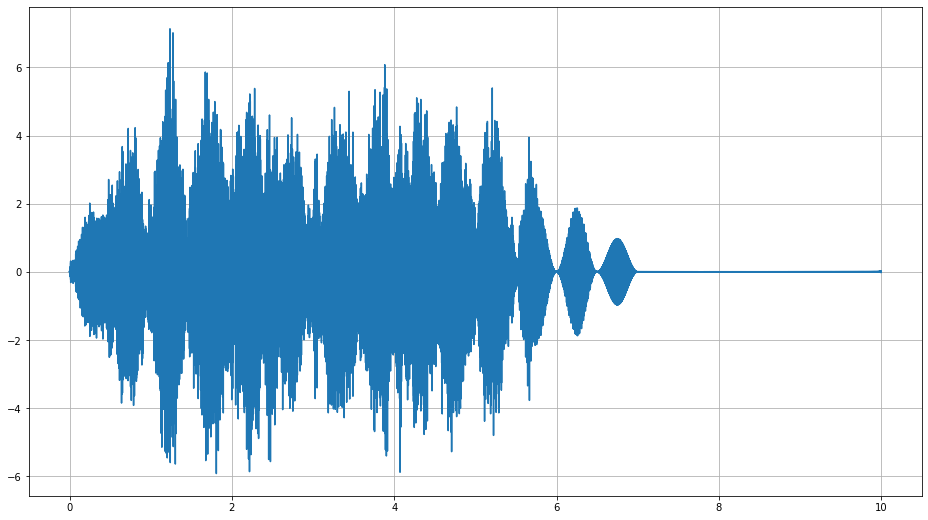

In [21]:
c =  h0*(np.conj(h)*r1 + h*r2 + np.conj(h)*np.conj(h)*np.conj(h)*r3 + h*h*h*r4)
plt.figure(figsize=(16,9))
plt.plot(t,np.real(c))
plt.grid('on')
plt.show()

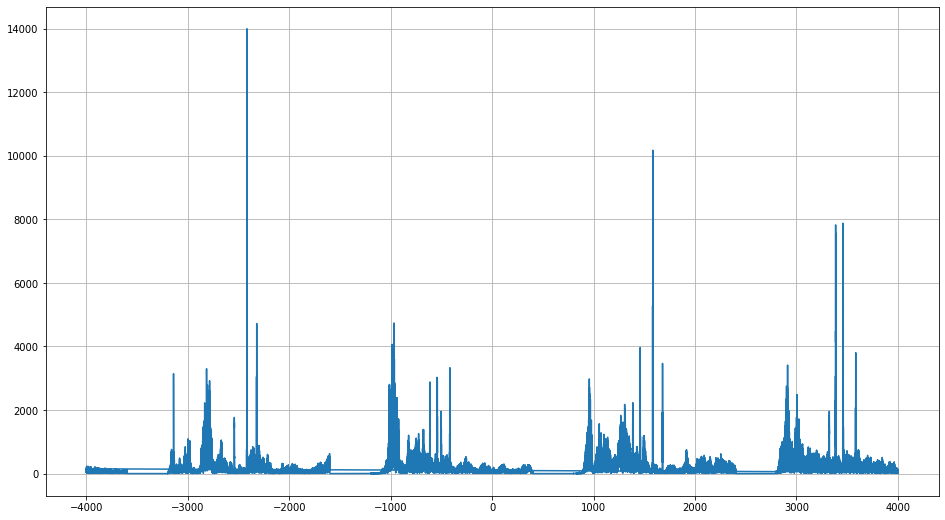

In [22]:
C = np.fft.fft(c)
plt.figure(figsize=(16,9))
plt.plot(freq,np.abs(C))
plt.grid('on')
plt.show()

- 합성된 신호가 어떻게 들리는 지 확인해 봅니다.

In [23]:
Audio(c,rate=fs)

/usr/local/lib/python3.7/dist-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


## 한 사람의 음성신호를 복원하기
- 위의 과정을 통해 합성된 신호는 각각 다른 학생의 음성이 다른 주파수 대역에 정보를 가지고 있습니다. 
- 각각 학생의 음성을 담고 있는 주파수 대역을 알고 있으면, demodulation 및 lowpass filtering을 통해 해당 학생의 음성을 선택적으로 복원할 수 있습니다.
- demodulation
- lowpass filtering

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


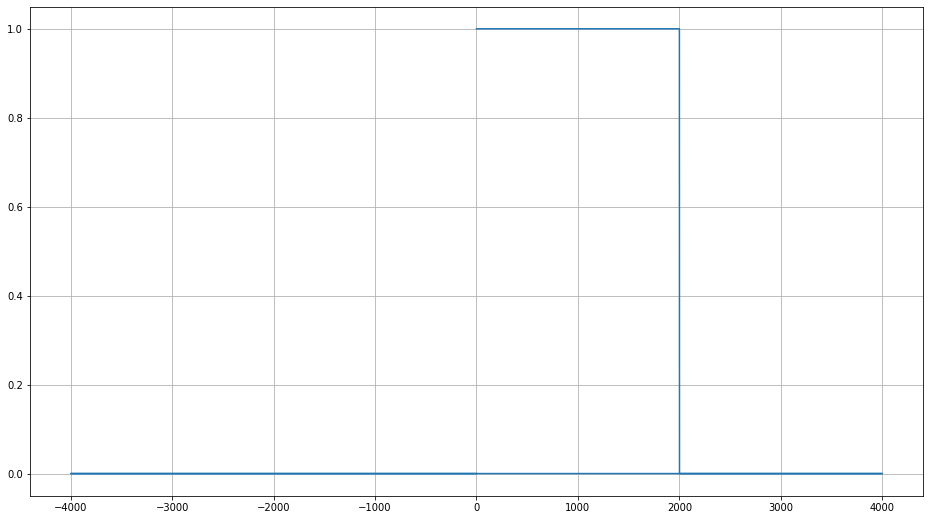

In [25]:
fr = 1200 # frequency for demodulation 
wr = 2000 # frequency for lowpass filtering

hr = np.exp(1j*2*np.pi*fr*t)
HR = np.ones_like(c)
HR[freq<0]=0
HR[freq>wr]=0
plt.figure(figsize=(16,9))
plt.plot(freq,HR)
plt.grid('on')
plt.show()


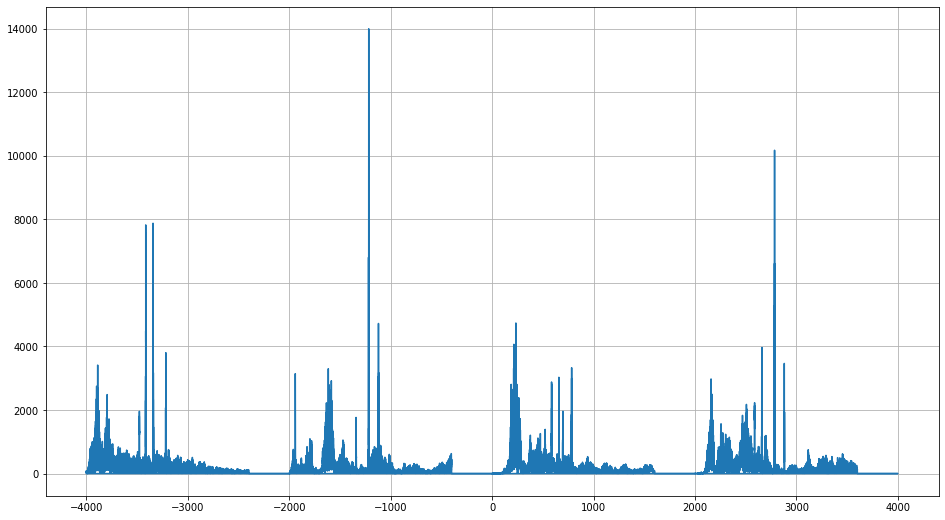

In [26]:
rd = c*hr
RD = np.fft.fft(rd)
plt.figure(figsize=(16,9))
plt.plot(freq,np.abs(RD))
plt.grid('on')
plt.show()

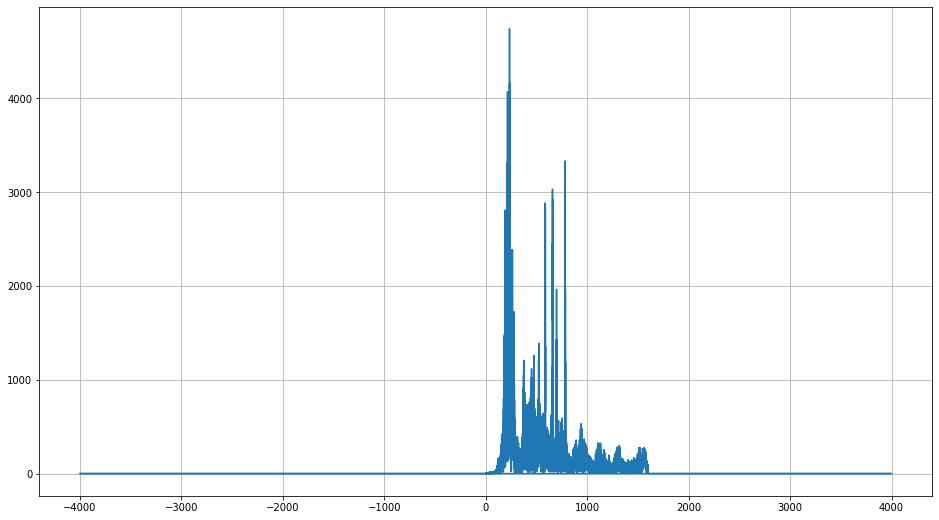

In [27]:
RDL = RD*HR
plt.figure(figsize=(16,9))
plt.plot(freq,np.abs(RDL))
plt.grid('on')
plt.show()

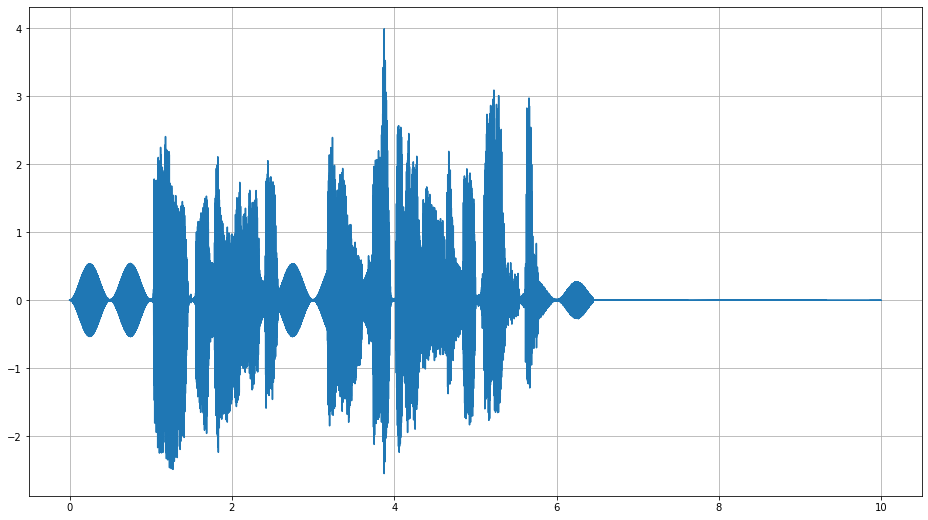

In [31]:
rdl = np.fft.ifft(RDL)
plt.figure(figsize=(16,9))
plt.plot(t,np.real(rdl))
plt.grid('on')
plt.show()

In [33]:
Audio(rdl,rate=fs)

/usr/local/lib/python3.7/dist-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)
